In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df1=pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
df2=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df3=pd.read_csv('/kaggle/input/credit-card-fraud/archive/creditcard.csv')



In [3]:
# Step 1: Strip the quotes from the string values
df3['Class'] = df3['Class'].str.strip("'")

# Step 2: Convert the cleaned values to integers
df3['Class'] = df3['Class'].astype(int)

# Now the 'Class' column should contain integer values without errors.
print(df3['Class'].head())


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [4]:
df = pd.concat([df1, df2,df3])
print(df)


         id         V1         V2        V3        V4        V5        V6  \
0       0.0  -0.260648  -0.469648  2.496266 -0.083724  0.129681  0.732898   
1       1.0   0.985100  -0.356045  0.558056 -0.429654  0.277140  0.428605   
2       2.0  -0.260272  -0.949385  1.728538 -0.457986  0.074062  1.419481   
3       3.0  -0.152152  -0.508959  1.746840 -1.090178  0.249486  1.143312   
4       4.0  -0.206820  -0.165280  1.527053 -0.448293  0.106125  0.530549   
...     ...        ...        ...       ...       ...       ...       ...   
284802  NaN -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  NaN  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  NaN   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  NaN  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  NaN  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V22       V23       V24  \


In [5]:
print(df['Class'].tail())

284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64


In [6]:
print('df1 columns:',df1.columns)
print('df2 columns:',df2.columns)
print('df3 columns:',df3.columns)

df1 columns: Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
df2 columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
df3 columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
df=df.drop(columns=['id','Time'])
# df = df.drop(columns=['id', 'Time'])


In [8]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,...,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06
mean,5.623196e-16,1.042738e-16,-7.135366e-16,1.046933e-15,5.077856e-16,7.243236e-16,-3.066290e-16,6.497138e-17,-1.187675e-15,1.218850e-15,...,1.050229e-16,-1.711929e-16,1.372339e-16,2.237068e-15,2.393104e-16,8.389068e-16,-2.011035e-16,-4.808557e-17,6.059987e+03,2.506484e-01
std,1.555463e+00,1.365340e+00,1.284552e+00,1.225877e+00,1.205375e+00,1.178052e+00,1.124912e+00,1.101555e+00,1.050516e+00,1.045407e+00,...,8.772477e-01,8.735654e-01,8.334936e-01,8.265171e-01,7.972143e-01,7.848184e-01,7.622978e-01,7.443740e-01,7.724864e+03,4.333866e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-2.256568e+01,-3.903524e+01,0.000000e+00,0.000000e+00
25%,-7.399687e-01,-5.212071e-01,-7.140152e-01,-7.558858e-01,-5.099615e-01,-6.662957e-01,-4.402643e-01,-1.963533e-01,-6.088732e-01,-5.581357e-01,...,-1.921538e-01,-5.139860e-01,-1.980442e-01,-4.775442e-01,-4.138742e-01,-4.485287e-01,-2.243943e-01,-1.024510e-01,2.200000e+01,0.000000e+00
50%,-7.199910e-02,-6.677903e-02,6.498254e-02,-4.994370e-02,3.617383e-02,-7.491834e-02,1.490380e-01,-6.719679e-02,2.147066e-02,1.235895e-02,...,-3.405187e-02,-1.122193e-02,-3.256524e-02,3.411954e-02,6.039339e-03,-4.064936e-02,-2.668311e-02,7.304377e-03,6.064850e+02,0.000000e+00
75%,1.120554e+00,5.596943e-01,8.205171e-01,7.243386e-01,5.075308e-01,4.656919e-01,5.407734e-01,1.874876e-01,5.750820e-01,5.613828e-01,...,1.702034e-01,4.957815e-01,1.510765e-01,5.216416e-01,4.249851e-01,4.204212e-01,1.489500e-01,1.556549e-01,1.202092e+04,1.000000e+00
max,2.454930e+00,2.205773e+01,1.412583e+01,1.687534e+01,4.271689e+01,7.330163e+01,2.178730e+02,2.000721e+01,2.027006e+01,3.172271e+01,...,2.720284e+01,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,2.569116e+04,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138244 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   V1      1138244 non-null  float64
 1   V2      1138244 non-null  float64
 2   V3      1138244 non-null  float64
 3   V4      1138244 non-null  float64
 4   V5      1138244 non-null  float64
 5   V6      1138244 non-null  float64
 6   V7      1138244 non-null  float64
 7   V8      1138244 non-null  float64
 8   V9      1138244 non-null  float64
 9   V10     1138244 non-null  float64
 10  V11     1138244 non-null  float64
 11  V12     1138244 non-null  float64
 12  V13     1138244 non-null  float64
 13  V14     1138244 non-null  float64
 14  V15     1138244 non-null  float64
 15  V16     1138244 non-null  float64
 16  V17     1138244 non-null  float64
 17  V18     1138244 non-null  float64
 18  V19     1138244 non-null  float64
 19  V20     1138244 non-null  float64
 20  V21     1138244 non-null  floa

In [11]:
df.isnull().sum()



V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# to summerize all 
df.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,...,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06,1.138244e+06
mean,5.623196e-16,1.042738e-16,-7.135366e-16,1.046933e-15,5.077856e-16,7.243236e-16,-3.066290e-16,6.497138e-17,-1.187675e-15,1.218850e-15,...,1.050229e-16,-1.711929e-16,1.372339e-16,2.237068e-15,2.393104e-16,8.389068e-16,-2.011035e-16,-4.808557e-17,6.059987e+03,2.506484e-01
std,1.555463e+00,1.365340e+00,1.284552e+00,1.225877e+00,1.205375e+00,1.178052e+00,1.124912e+00,1.101555e+00,1.050516e+00,1.045407e+00,...,8.772477e-01,8.735654e-01,8.334936e-01,8.265171e-01,7.972143e-01,7.848184e-01,7.622978e-01,7.443740e-01,7.724864e+03,4.333866e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-2.256568e+01,-3.903524e+01,0.000000e+00,0.000000e+00
25%,-7.399687e-01,-5.212071e-01,-7.140152e-01,-7.558858e-01,-5.099615e-01,-6.662957e-01,-4.402643e-01,-1.963533e-01,-6.088732e-01,-5.581357e-01,...,-1.921538e-01,-5.139860e-01,-1.980442e-01,-4.775442e-01,-4.138742e-01,-4.485287e-01,-2.243943e-01,-1.024510e-01,2.200000e+01,0.000000e+00
50%,-7.199910e-02,-6.677903e-02,6.498254e-02,-4.994370e-02,3.617383e-02,-7.491834e-02,1.490380e-01,-6.719679e-02,2.147066e-02,1.235895e-02,...,-3.405187e-02,-1.122193e-02,-3.256524e-02,3.411954e-02,6.039339e-03,-4.064936e-02,-2.668311e-02,7.304377e-03,6.064850e+02,0.000000e+00
75%,1.120554e+00,5.596943e-01,8.205171e-01,7.243386e-01,5.075308e-01,4.656919e-01,5.407734e-01,1.874876e-01,5.750820e-01,5.613828e-01,...,1.702034e-01,4.957815e-01,1.510765e-01,5.216416e-01,4.249851e-01,4.204212e-01,1.489500e-01,1.556549e-01,1.202092e+04,1.000000e+00
max,2.454930e+00,2.205773e+01,1.412583e+01,1.687534e+01,4.271689e+01,7.330163e+01,2.178730e+02,2.000721e+01,2.027006e+01,3.172271e+01,...,2.720284e+01,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,2.569116e+04,1.000000e+00


<Axes: >

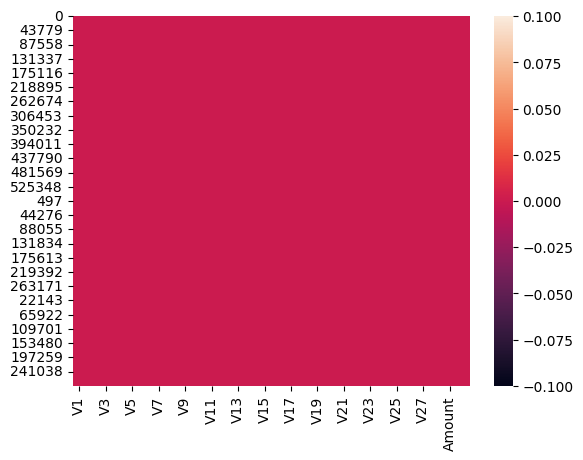

In [13]:
df.isnull().sum()
sns.heatmap(df.isnull())

In [14]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

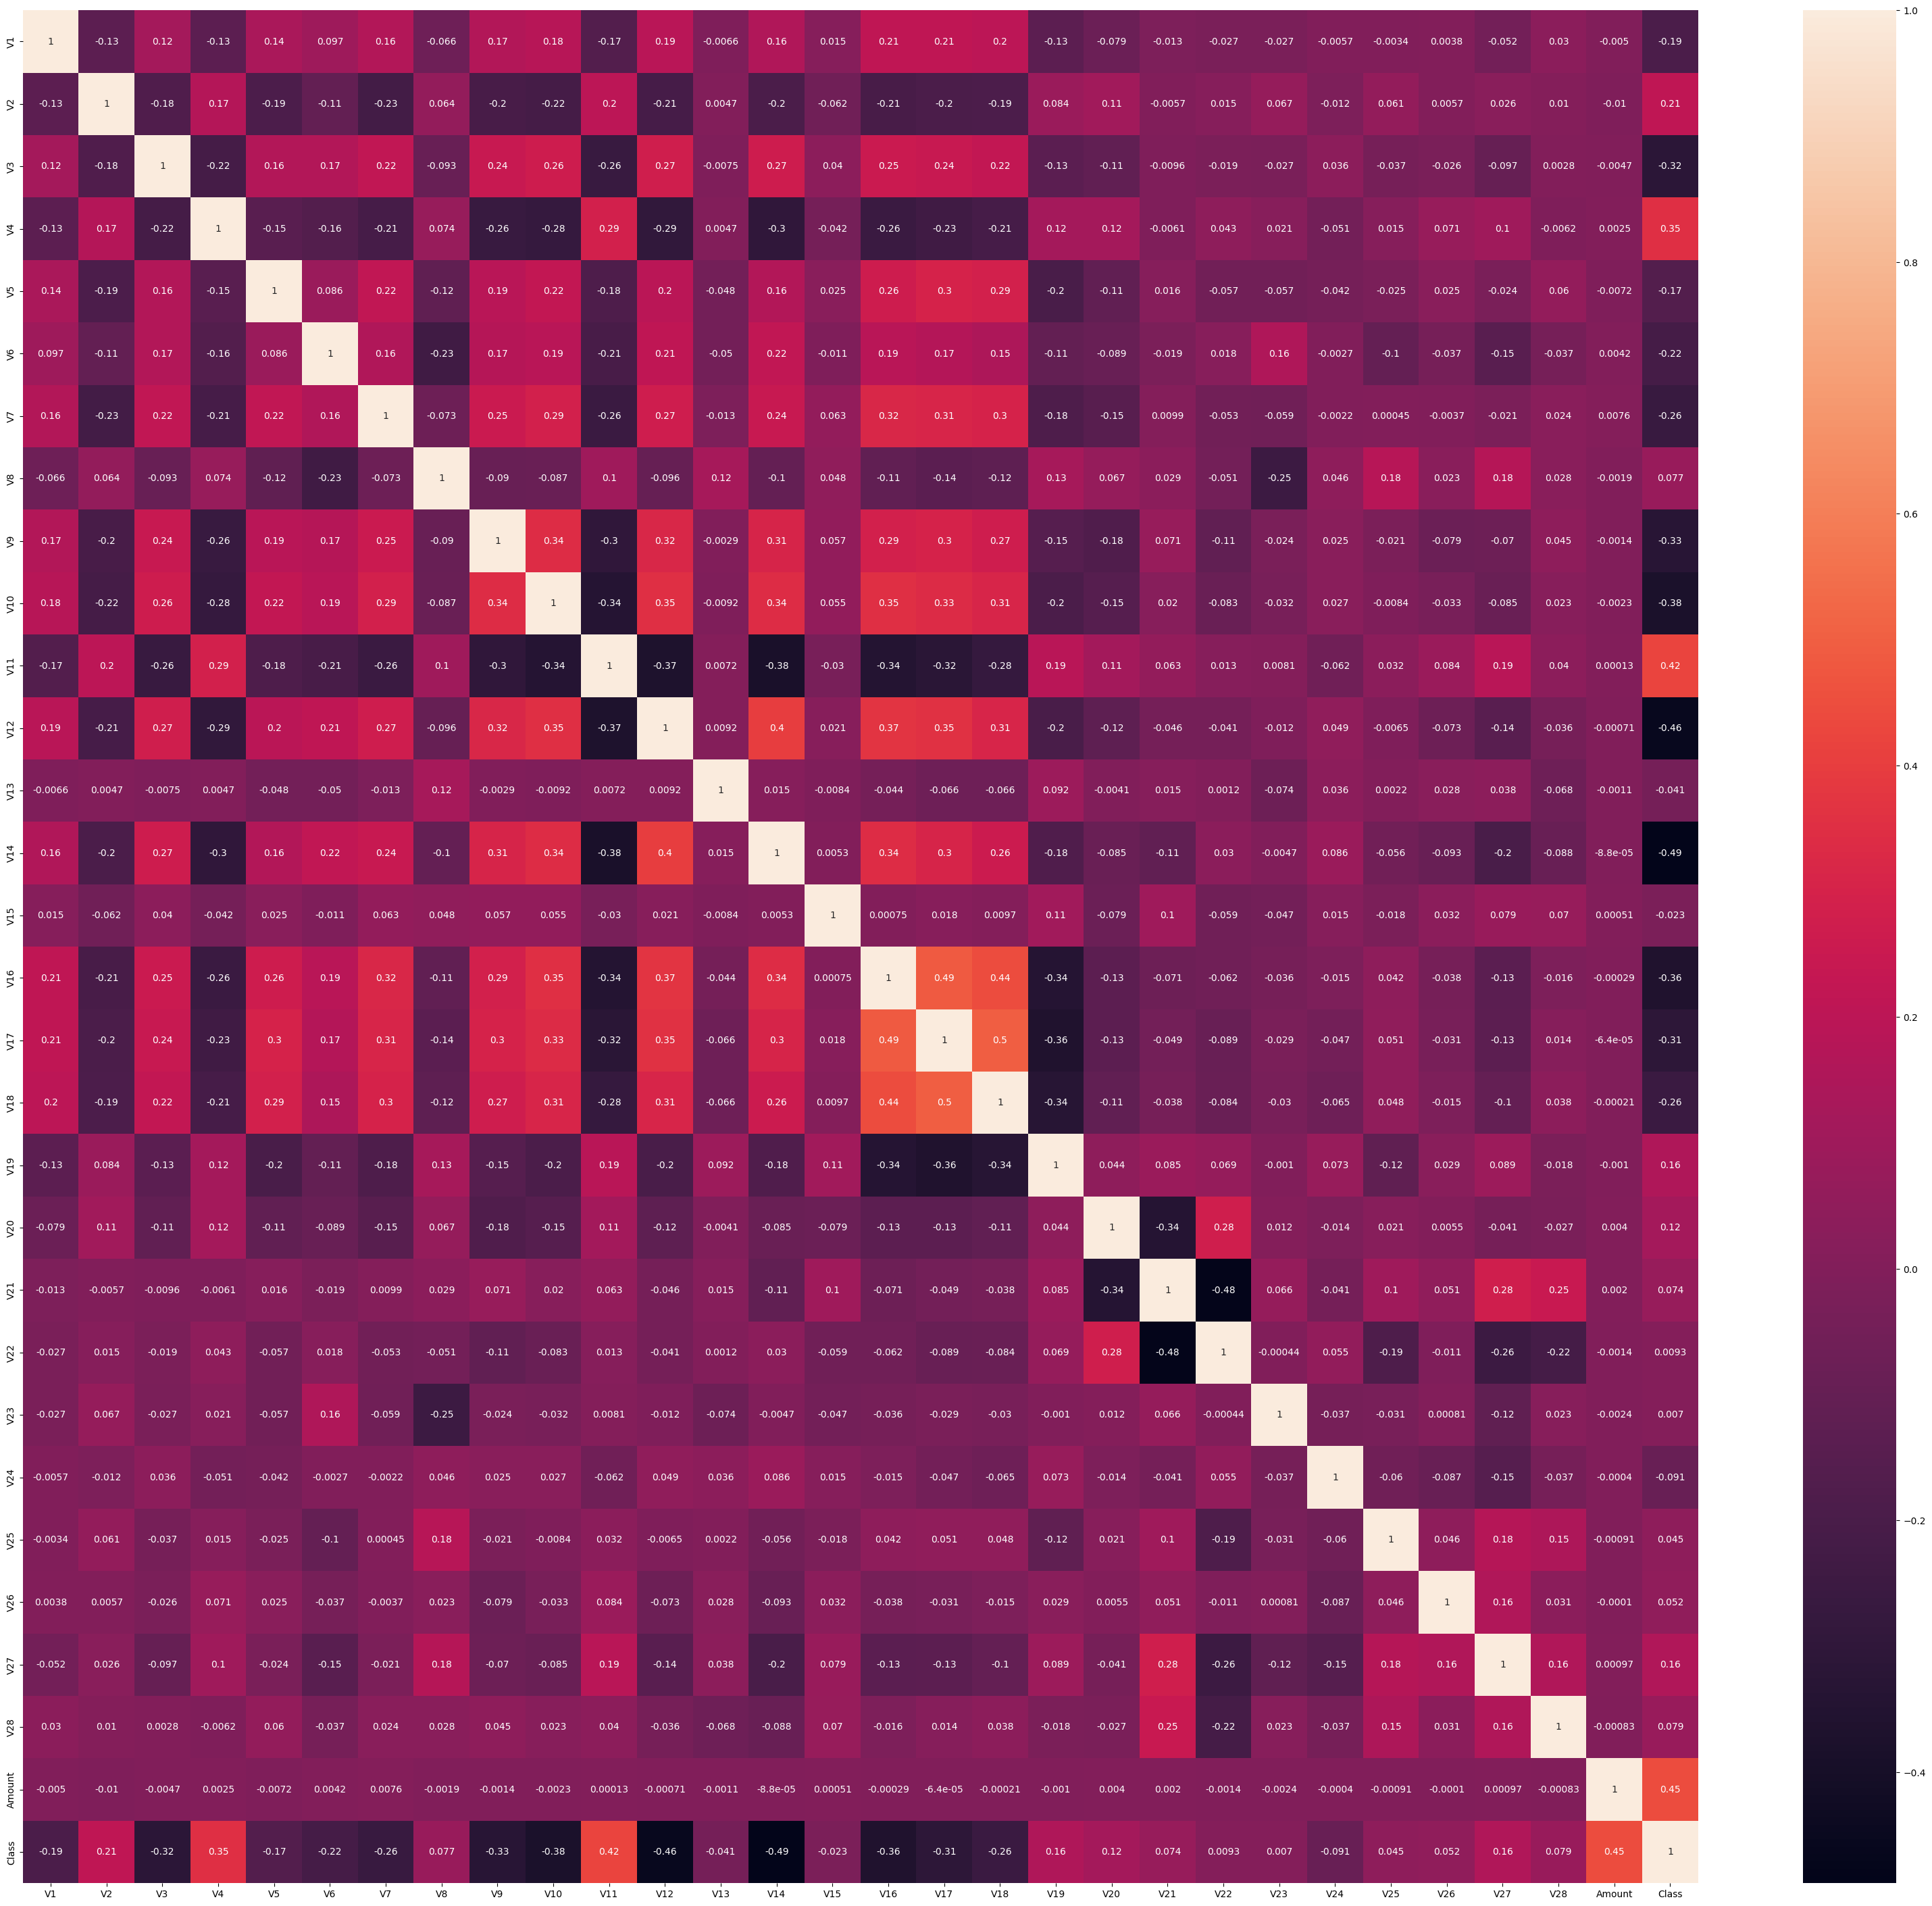

In [15]:
plt.figure(figsize=(40,36))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df['Class'].value_counts()

Class
0    852945
1    285299
Name: count, dtype: int64

In [17]:
df['Amount'].value_counts()

Amount
1.00        27376
1.98        12088
0.89         9744
9.99         9494
15.00        6560
            ...  
23007.67        1
5894.29         1
21950.92        1
6654.48         1
17361.26        1
Name: count, Length: 533351, dtype: int64

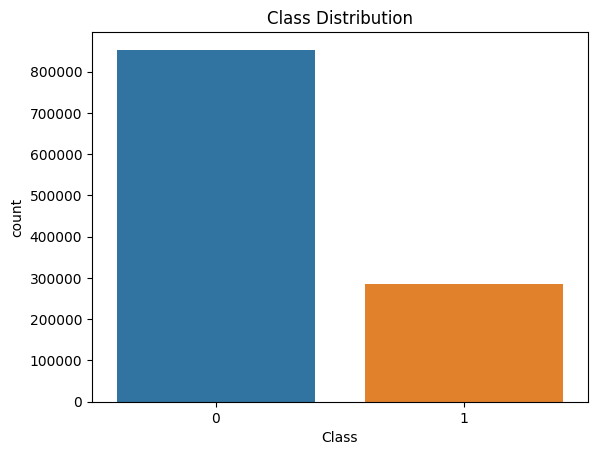

In [18]:
sns.countplot(x='Class',data=df)
plt.title('Class Distribution')
plt.show()

In [19]:
# sns.boxplot(x='Class',y='Time',data=df)
# plt.title('Class vs TIme')
# plt.show()

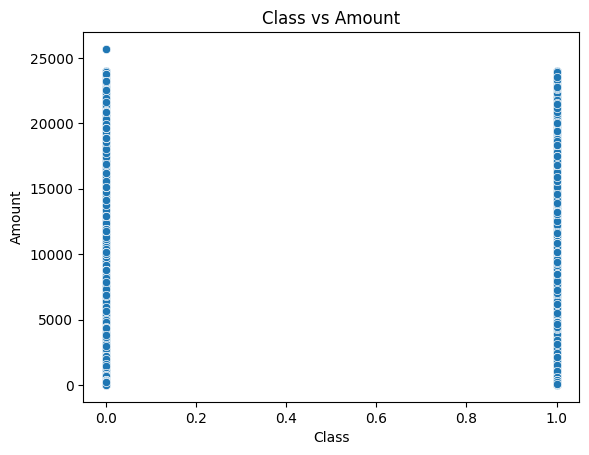

In [20]:
sns.scatterplot(x='Class',y='Amount',data=df)
plt.title('Class vs Amount')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split 

x=df.drop('Class',axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_log=LogisticRegression()
model_log.fit(X_train_scaled,y_train)
y_pred_log=model_log.predict(X_test_scaled)
print(f'Accuracy:{accuracy_score(y_test,y_pred_log)}')
print(classification_report(y_test,y_pred_log))

Accuracy:0.9415635473909396
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    170484
           1       0.94      0.82      0.88     57165

    accuracy                           0.94    227649
   macro avg       0.94      0.90      0.92    227649
weighted avg       0.94      0.94      0.94    227649



In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model_xg=XGBClassifier()
model_xg.fit(X_train_scaled,y_train)
y_pred_xg=model_xg.predict(X_test_scaled)
print(f'Accuracy:{accuracy_score(y_test,y_pred_xg)}')
print(classification_report(y_test,y_pred_xg))

Accuracy:0.9997056872641654
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170484
           1       1.00      1.00      1.00     57165

    accuracy                           1.00    227649
   macro avg       1.00      1.00      1.00    227649
weighted avg       1.00      1.00      1.00    227649



In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model_sv=SVC(kernel='rbf', C=1.0, gamma='scale')
model_sv.fit(X_train_scaled,y_train)
y_pred_sv=model_sv.predict(X_test_scaled)
print(f'Accuracy:{accuracy_score(y_test,y_pred_sv)}')
print(classification_report(y_test,y_pred_sv))

Accuracy:0.9983790835892097
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170484
           1       1.00      1.00      1.00     57165

    accuracy                           1.00    227649
   macro avg       1.00      1.00      1.00    227649
weighted avg       1.00      1.00      1.00    227649



In [33]:
print(y_pred_sv)

[0 0 0 ... 0 0 1]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

y_pred = model.predict(X_test_scaled)


2024-08-19 04:31:41.264833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 04:31:41.265002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 04:31:41.413708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
   94/11383 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6002 - loss: 37.1487

I0000 00:00:1724041914.365395     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724041914.382217     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11383/11383 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 2.1157

W0000 00:00:1724041932.346641     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11383/11383 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8966 - loss: 2.1156 - val_accuracy: 0.9752 - val_loss: 0.1917
Epoch 2/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9753 - loss: 0.0693 - val_accuracy: 0.9794 - val_loss: 0.0557
Epoch 8/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9771 - loss: 0.0632 - val_accuracy: 0.9788 - val_loss: 0.0556
Epoch 9/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9780 - loss: 0.0617 - val_accuracy: 0.9723 - val_loss: 0.0812
Epoch 10/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9782 - loss: 0.0600 - val_accuracy: 0.9667 - val_loss: 0.1067
Epoch 11/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9778 - loss: 0.0612 - val_accuracy: 0.9757 - val_loss: 0.0690
Epoch 12/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9792 - loss: 0.0566 - val_accuracy: 0.9793 - val_loss: 0.0548
Epoch 19/20
11383/11383 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9794 

In [31]:
y_pred = model.predict(X_test_scaled)

7115/7115 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [32]:
print(y_pred)
print(y_test)

[[1.6557585e-06]
 [5.5688970e-16]
 [1.1655584e-05]
 ...
 [1.7043889e-02]
 [2.2319918e-08]
 [8.6104298e-01]]
137029    0
81437     0
276655    0
75997     0
424159    1
         ..
163418    0
353100    1
125542    0
78933     0
438617    1
Name: Class, Length: 227649, dtype: int64


In [34]:

y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

# Now calculate accuracy and classification report using the binary predictions
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(classification_report(y_test, y_pred_binary))


Accuracy: 0.9328088416817117
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    170484
           1       0.99      0.74      0.85     57165

    accuracy                           0.93    227649
   macro avg       0.95      0.87      0.90    227649
weighted avg       0.94      0.93      0.93    227649



In [ ]:
# import dash
# from dash import html, dcc, Input, Output, State
# import pandas as pd
# import joblib  # Assuming you're loading a pre-trained model

# # Load your pre-trained model
# # model = joblib.load('your_model_filename.pkl')  # Replace with your actual model filename

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the layout of the app
# app.layout = html.Div([
#     html.Div([
#         html.H1("Credit Card Fraud Detection", style={'text-align': 'center'}),
        
#         html.Div([
#             dcc.Input(id='feature1', type='number', placeholder='Feature 1',
#                       style={'margin': '10px', 'padding': '10px'}),
#             dcc.Input(id='feature2', type='number', placeholder='Feature 2',
#                       style={'margin': '10px', 'padding': '10px'}),
#             dcc.Input(id='feature3', type='number', placeholder='Feature 3',
#                       style={'margin': '10px', 'padding': '10px'}),
#             dcc.Input(id='feature4', type='number', placeholder='Feature 4',
#                       style={'margin': '10px', 'padding': '10px'}),
#             html.Button('Predict Fraud', id='predict_button', n_clicks=0,
#                         style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
#         ], style={'text-align': 'center'}),
        
#         html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
#     ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
# ])

# # Define callback to update output
# @app.callback(
#     Output('prediction_output', 'children'),
#     [Input('predict_button', 'n_clicks')],
#     [State('feature1', 'value'), 
#      State('feature2', 'value'),
#      State('feature3', 'value'),
#      State('feature4', 'value')]
# )
# def update_output(n_clicks, feature1, feature2, feature3, feature4):
#     if n_clicks > 0 and all(v is not None for v in [feature1, feature2, feature3, feature4]):
#         # Prepare the feature vector
#         features = pd.DataFrame([[feature1, feature2, feature3, feature4]], 
#                                 columns=['feature1', 'feature2', 'feature3', 'feature4'])
#         # Predict
#         prediction = model.predict(features)[0]
#         prediction_class = "Fraudulent" if prediction == 1 else "Non-Fraudulent"
#         return f'Prediction: {prediction_class}'
#     elif n_clicks > 0:
#         return 'Please enter all values to get a prediction'
#     return ''

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)
